<a href="https://colab.research.google.com/github/DavidMercadoFaustino/Analyzing-Data-with-Python---IBM-DA0101EN/blob/master/Modulo_3_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estatistica Descritiva
Objetivos:


*   Descrever caracteristas basicas dos dados
*   Resumir os dados.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/sample_data/clean_df.csv')

In [3]:
# Resumo estatistico usando pandas .describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,201.0,100.000000,58.167861,0.000000,50.000000,100.000000,150.000000,200.000000
symboling,201.0,0.840796,1.254802,-2.000000,0.000000,1.000000,2.000000,3.000000
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,0.899108,0.040933,0.799331,0.869565,0.904682,0.928094,1.000000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000


In [4]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0,11.190476,Low,0,1,1,0,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0,11.190476,Low,0,1,1,0,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0,12.368421,Medium,0,1,1,0,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0,9.791667,Low,0,1,1,0,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22.0,17450.0,13.055556,Low,0,1,1,0,1,0


In [5]:
# Resumo estatistico de variáveis categoricas usando o .value_counts()
drive_wheels_counts = pd.DataFrame(df['drive-wheels'].value_counts())

In [6]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Podemos também visualizar essas analise descritivas usando o Box Plot, que observaremos como a variavel se distribui em relação a média. 

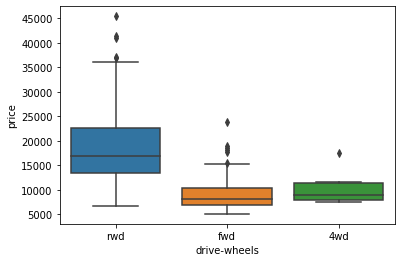

In [8]:
# Visualização utilizando o Box plot
sns.boxplot(x='drive-wheels', y='price', data=df)

Otra forma de visualizar é utilizando o Scatter Plot que conseguimos observar as relações entre duas variaveis observando a distribuição dos pontos dentro de um grafico.

Text(0, 0.5, 'Price')

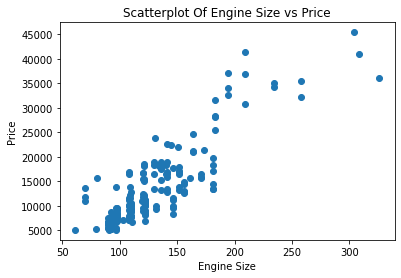

In [9]:
# Observação as relações entre as variaveis, utilizando o Scatter plot
y = df['price'] # No eixo 'X' sempre a variavel independente
x = df['engine-size'] # No eixo 'Y' a variavel dependente
plt.scatter(x,y)

plt.title('Scatterplot Of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

## Agrupando os dados
Usando o panda o metodo dataframe.Grouby(), Pivot(), Heatmap podemos:

*   Pode ser aplicado em variaveis categoricas
*   Pode agrupar dados dentro de categorias
*   Pode ser usado com uma ou multiplas variaveis

In [10]:
df_test = df[['drive-wheels','body-style', 'price']]

In [11]:
df_grp = df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [12]:
# Usando Metodo Pivot()
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

<function matplotlib.pyplot.show>

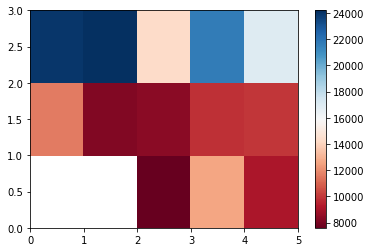

In [13]:
# Usando Heatmap
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show

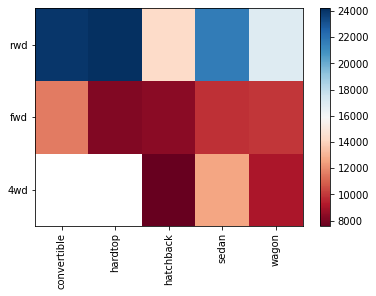

In [14]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlação entre variáveis
relação entre as variáveis não significa uma relação de casualidade

In [21]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162490,0.144301,-0.022505,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454,-0.082739,0.082739,-0.082739,0.082739
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615,0.054615,-0.054615
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911,0.006911,-0.006911
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889,-0.256889,0.256889
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085,-0.230085,0.230085
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732,-0.305732,0.305732
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336,-0.090336,0.090336
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955,-0.321955,0.321955
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040,-0.110040,0.110040
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816,-0.227816,0.227816


(0.0, 53550.072643715364)

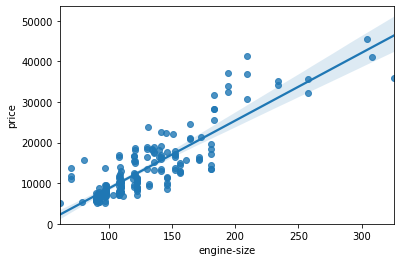

In [22]:
# Correlação positiva
sns.regplot(x='engine-size', y='price',data=df)
plt.ylim(0,)

(0.0, 48153.111268515786)

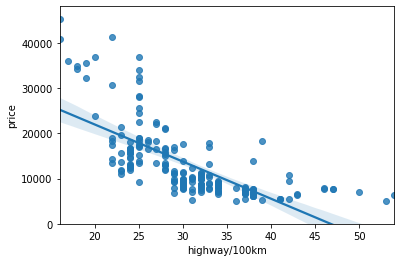

In [23]:
#correlação negativa
sns.regplot(x='highway/100km', y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

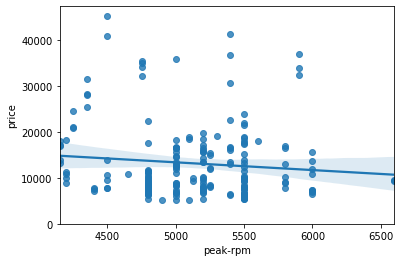

In [24]:
# Correlação fraca
sns.regplot(x='peak-rpm', y='price',data=df)
plt.ylim(0,)

## Correlação de Pearson
Mede a 'força' da correlação entre duas variáveis, por dois metodos:

Coefiente de correlação:
* Proximo de + 1 = Correlação forte positiva
* Proximo de - 1 = Correlação forte negativa
* Proxima de 0 = Sem correlação

P_value - mede a confiança no resultado do coeficiente
* P_value < 0,001 Forte confiança no resultado
* P_value < 0,05 Moderada confiança no resultado
* P_value < 0,1 Fraca confiança no resultado
* P_value > 0,1 Sem confiança no resultado

In [25]:
#Correlação Positiva
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('p_valeu:', p_value, 'Coeficiente de Pearson:',pearson_coef)

p_valeu: 6.273536270650504e-48 Coeficiente de Pearson: 0.8096068016571054


In [27]:
#Correlação Negativa
pearson_coef1, p_value1 = stats.pearsonr(df['highway/100km'], df['price'])
print('p_valeu:', p_value1, 'Coeficiente de Pearson:',pearson_coef1)

p_valeu: 1.7495471144476358e-31 Coeficiente de Pearson: -0.704692265058953


In [28]:
#Correlação Nula
pearson_coef2, p_value2 = stats.pearsonr(df['peak-rpm'], df['price'])
print('p_valeu:', p_value2, 'Coeficiente de Pearson:',pearson_coef2)

p_valeu: 0.1511769165144532 Coeficiente de Pearson: -0.10161587407588148


## Analise da Variança (ANOVA)
Essa analise usa teste F para testar estatisticamente a igualdade entre médias. Então verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente. Essa analise é colocada para ver a relação entre as médias amostrais de variaveis categoricas.

In [29]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [30]:
# Analise da Variancia entre os 3 grupos (rwd, fwd e 4wd)
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Como o valor de F = 67.95 e o P_valeu muito pequeno, vemos que existe diferença estatistca entre as médias amostrais. Agora qual das médias é diferente estatisticamente é o que devemos buscar.

In [31]:
# ANOVA 1
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [32]:
# ANOVA 2
f_val, p_val = stats.f_oneway(grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [33]:
# ANOVA 3
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


Então vemos que:
a Tração traseira (rwd) tem uma média amostral diferente das outras categoria
nas duas analises ANOVA 1 e ANOVA 2 temos valores de F 130 e P_valeu 2.23553e-34;  F 8,58 e P_value 0,0044, respectivamente.

Para as Amostras de tração nas 4 rodas(4wd) e Tração na dianteira(fwd) não existe uma diferença estatistica entre as médias amostrais, como é observado na analise ANOVA 3 temos F  0,665 e P_value 0,416